In [7]:
# 🧩 Block 0: Basic Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# 🧩 Block 1: Load and inspect dataset

df = pd.read_csv("./dataset_phishing.csv")  # replace with your dataset path
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


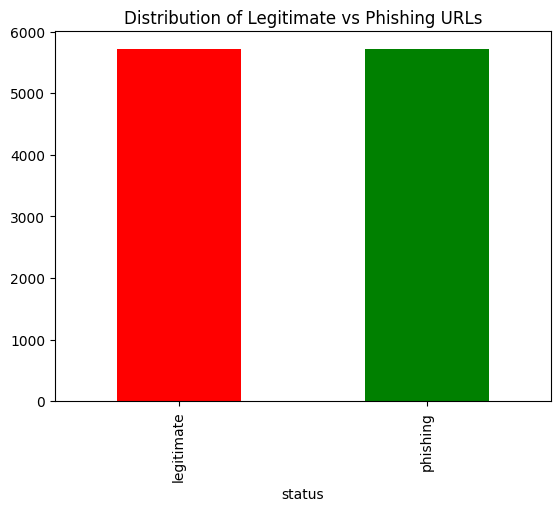

In [ ]:
df['status'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Distribution of Legitimate vs Phishing URLs")
plt.show()

In [ ]:
# 🧩 Block 2: Encode labels and vectorize URLs
df.dropna(inplace=True, subset = ['url','status'])
df['type'] = df['status'].str.lower()
df['type'] = df['type'].map({'legitimate': 0, 'phishing': 1})

X = df['url']
y = df['type']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    analyzer='char_wb',  # character n-grams capture URL patterns well
    ngram_range=(3, 5)
)

X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 🧩 Block 3: Logistic Regression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Results 🔹")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

🔹 Logistic Regression Results 🔹
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1157
           1       0.91      0.90      0.90      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

Accuracy: 0.9063867016622922


Test dataset shape: (504932, 2)
Label distribution in test dataset:
type
0    345738
1    159194
Name: count, dtype: int64
🔹 Test Performance on New Dataset 🔹
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    345738
           1       0.96      0.86      0.91    159194

    accuracy                           0.94    504932
   macro avg       0.95      0.92      0.93    504932
weighted avg       0.95      0.94      0.94    504932

Accuracy: 0.944396473188469


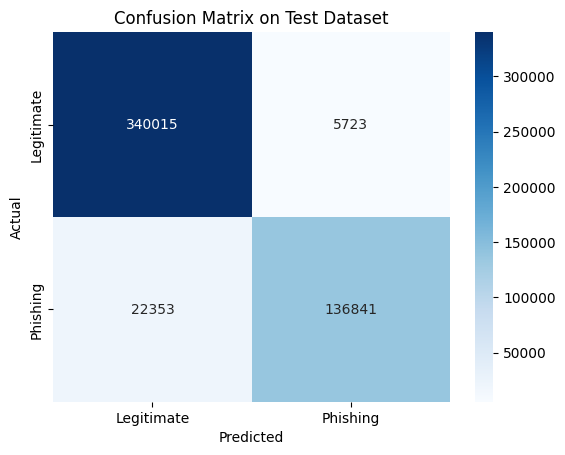

In [ ]:
import pandas as pd

# Load test dataset
test_df = pd.read_csv("/content/drive/MyDrive/IBM Datathon 2025/combined_urls_clean.csv")

# Use only 'url' and 'status'
test_df = test_df[['url', 'type']].dropna()

print("Test dataset shape:", test_df.shape)
test_df.head()

X_test_urls = test_df['url']
y_test = test_df['type'].str.lower().map({'legitimate': 0, 'phishing': 1})

print("Label distribution in test dataset:")
print(y_test.value_counts())

# Use the same vectorizer that was used for training
X_test_tfidf = vectorizer.transform(X_test_urls)  # NOTE: .transform(), NOT .fit_transform()

# Predict with trained model
y_pred_test = lr.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("🔹 Test Performance on New Dataset 🔹")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate','Phishing'], yticklabels=['Legitimate','Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix on Test Dataset')
plt.show()

In [ ]:
import joblib
joblib.dump(lr, './url_classifier_lr_model.pkl')

In [ ]:
vectorizer_path = './url_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)

print(f" Vectorizer saved at: {vectorizer_path}")